**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KDTree
from sklearn.model_selection import KFold
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import preprocessing

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [3]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        self.X_train = np.asarray(X)
        self.y_train = np.asarray(y)
        return self
    
    def predict(self, X):
        if self.algorithm == 'brute':
            X = np.asarray(X)
            dist = pairwise_distances(X, self.X_train, self.metric)
            a = np.take_along_axis(self.y_train[np.newaxis,:], np.argpartition(dist, self.n_neighbors - 1, axis=1)[:, :self.n_neighbors], axis=1)
            ans = np.apply_along_axis(lambda r: np.bincount(r).argmax(), 1, a)
        if self.algorithm == 'kd_tree':
            tree = KDTree(self.X_train)
            ind = tree.query(X, k=self.n_neighbors, return_distance = False)
            ans = np.apply_along_axis(lambda r: np.bincount(r).argmax(), 1, np.take(self.y_train, ind))
        return ans 

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

MyKNeighborsClassifier(n_neighbors=2)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 1.31 ms, sys: 690 µs, total: 2 ms
Wall time: 1.82 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 12 µs, sys: 1 µs, total: 13 µs
Wall time: 16 µs


MyKNeighborsClassifier(n_neighbors=2)

In [11]:
%time clf.predict(X_test)

CPU times: user 2.16 ms, sys: 240 µs, total: 2.4 ms
Wall time: 2.35 ms


array([2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 1.96 ms, sys: 1.67 ms, total: 3.63 ms
Wall time: 2.97 ms


array([2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 1.23 ms, sys: 79 µs, total: 1.31 ms
Wall time: 3.19 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 16 µs


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [17]:
%time clf.predict(X_test)

CPU times: user 3.79 ms, sys: 1.13 ms, total: 4.93 ms
Wall time: 6.07 ms


array([2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 1.36 ms, sys: 906 µs, total: 2.26 ms
Wall time: 1.84 ms


array([2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
vectorizer = CountVectorizer(max_features = 1000)
X = vectorizer.fit_transform(data)
normalized_X = preprocessing.scale(X.toarray())

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
accuracy = ()
kf = KFold(n_splits=3)
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')    
for train_index, test_index in kf.split(normalized_X):
    X_train, X_test = normalized_X[train_index], normalized_X[test_index]
    y_train, y_test = target[train_index], target[test_index]    
    my_clf.fit(X_train, y_train)
    my_clf_pred = my_clf.predict(X_test)
    accuracy += (accuracy_score(y_test, my_clf_pred), )
accuracy

(0.1792152704135737, 0.179262795014585, 0.17634579687085652)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
accuracy = ()
for k in range(1,21):
    acc = 0
    my_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute')
    kf = KFold(n_splits=3)
    for train_index, test_index in kf.split(normalized_X):
        X_train, X_test = normalized_X[train_index], normalized_X[test_index]
        y_train, y_test = target[train_index], target[test_index]    
        my_clf.fit(X_train, y_train)
        my_clf_pred = my_clf.predict(X_test)
        acc += accuracy_score(y_test, my_clf_pred)
    accuracy += (acc/3, )                                       
accuracy = np.asarray(accuracy)
k = accuracy.argmax() + 1
k

15

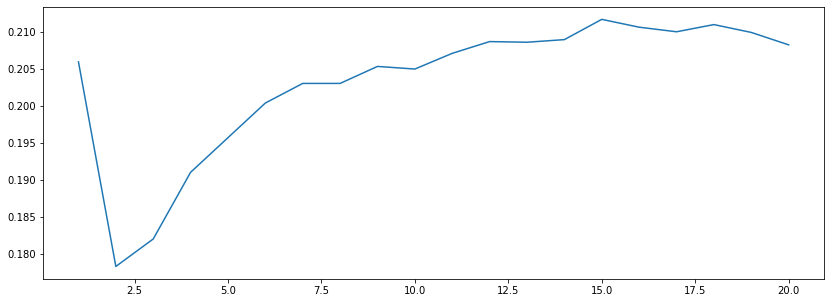

In [25]:
fig = plt.figure(figsize = (14,5))
plt.plot(range(1, 21), accuracy)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [26]:
vectorizer = CountVectorizer(max_features = 1000)
X = vectorizer.fit_transform(data)
normalized_X = preprocessing.scale(X.toarray())

In [27]:
accuracy = ()
kf = KFold(n_splits=3)
my_clf = MyKNeighborsClassifier(n_neighbors=15, algorithm='brute')    
for train_index, test_index in kf.split(normalized_X):
    X_train, X_test = normalized_X[train_index], normalized_X[test_index]
    y_train, y_test = target[train_index], target[test_index]    
    my_clf.fit(X_train, y_train)
    my_clf_pred = my_clf.predict(X_test)
    accuracy += (accuracy_score(y_test, my_clf_pred), )
accuracy

(0.2097030752916225, 0.21347122779103686, 0.2118801378944577)

In [28]:
accuracy = ()
kf = KFold(n_splits=3)
my_clf = MyKNeighborsClassifier(n_neighbors=15, algorithm='brute', metric='cosine')    
for train_index, test_index in kf.split(normalized_X):
    X_train, X_test = normalized_X[train_index], normalized_X[test_index]
    y_train, y_test = target[train_index], target[test_index]    
    my_clf.fit(X_train, y_train)
    my_clf_pred = my_clf.predict(X_test)
    accuracy += (accuracy_score(y_test, my_clf_pred), )
accuracy

(0.32025450689289503, 0.3105277114823654, 0.30708035003977724)

In [29]:
vectorizer = TfidfVectorizer(max_features = 1000)
X = vectorizer.fit_transform(data)
normalized_X = preprocessing.scale(X.toarray())

In [30]:
accuracy = ()
kf = KFold(n_splits=3)
my_clf = MyKNeighborsClassifier(n_neighbors=15, algorithm='brute')    
for train_index, test_index in kf.split(normalized_X):
    X_train, X_test = normalized_X[train_index], normalized_X[test_index]
    y_train, y_test = target[train_index], target[test_index]    
    my_clf.fit(X_train, y_train)
    my_clf_pred = my_clf.predict(X_test)
    accuracy += (accuracy_score(y_test, my_clf_pred), )
accuracy

(0.11373276776246023, 0.10474675152479448, 0.1052771148236542)

In [31]:
accuracy = ()
kf = KFold(n_splits=3)
my_clf = MyKNeighborsClassifier(n_neighbors=15, algorithm='brute', metric='cosine')    
for train_index, test_index in kf.split(normalized_X):
    X_train, X_test = normalized_X[train_index], normalized_X[test_index]
    y_train, y_test = target[train_index], target[test_index]    
    my_clf.fit(X_train, y_train)
    my_clf_pred = my_clf.predict(X_test)
    accuracy += (accuracy_score(y_test, my_clf_pred), )
accuracy

(0.4244432661717922, 0.43967117475470696, 0.42800318217979316)

In [ ]:
#CountVectorizer & 'euclidean'   (0.2097030752916225, 0.21347122779103686, 0.2118801378944577)
#CountVectorizer & 'cosine'      (0.32025450689289503, 0.3105277114823654, 0.30708035003977724)
#TfidfVectorizer & 'euclidean'   (0.11373276776246023, 0.10474675152479448, 0.1052771148236542)
#TfidfVectorizer & 'cosine'      (0.4244432661717922, 0.43967117475470696, 0.42800318217979316)

#Лучшая модель - TfidfVectorizer & 'cosine'

In [32]:
#найдем наилучшее число соседей на лучшей модели
vectorizer = TfidfVectorizer(max_features = 1000)
X = vectorizer.fit_transform(data)
normalized_X = preprocessing.scale(X.toarray())

In [33]:
accuracy = ()
for k in range(1,501,50):
    acc = 0
    my_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='cosine')
    kf = KFold(n_splits=3)
    for train_index, test_index in kf.split(normalized_X):
        X_train, X_test = normalized_X[train_index], normalized_X[test_index]
        y_train, y_test = target[train_index], target[test_index]    
        my_clf.fit(X_train, y_train)
        my_clf_pred = my_clf.predict(X_test)
        acc += accuracy_score(y_test, my_clf_pred)
    accuracy += (acc/3, )                                       
accuracy = np.asarray(accuracy)
k = accuracy.argmax() * 50
k

300

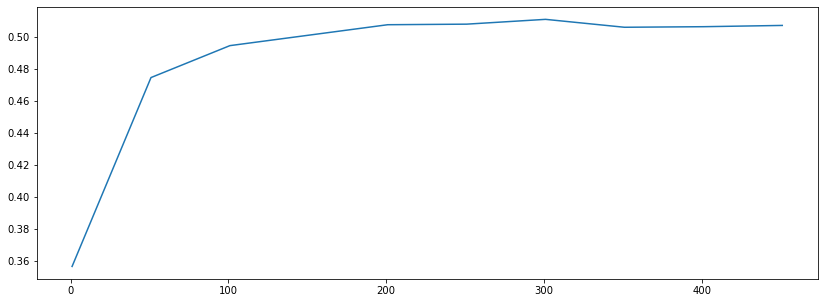

In [34]:
fig = plt.figure(figsize = (14,5))
plt.plot(range(1,501,50), accuracy)

In [35]:
#оценим точность в среднем на валидации на 3 фолдах для наилучшего числа соседей
vectorizer = TfidfVectorizer(max_features = 10000)
X = vectorizer.fit_transform(data)
normalized_X = preprocessing.scale(X.toarray())

In [36]:
accuracy = ()
kf = KFold(n_splits=3)
my_clf = MyKNeighborsClassifier(n_neighbors=300, algorithm='brute', metric='cosine')    
for train_index, test_index in kf.split(normalized_X):
    X_train, X_test = normalized_X[train_index], normalized_X[test_index]
    y_train, y_test = target[train_index], target[test_index]    
    my_clf.fit(X_train, y_train)
    my_clf_pred = my_clf.predict(X_test)
    accuracy += (accuracy_score(y_test, my_clf_pred), )
accuracy

(0.6431601272534464, 0.6398833200742509, 0.6234420578095996)

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [37]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [38]:
data2 = newsgroups['data']
target2 = newsgroups['target']
vectorizer = TfidfVectorizer(max_features = 10000)
X_train = vectorizer.fit_transform(data)
normalized_X_train = preprocessing.scale(X_train.toarray())
X_test = vectorizer.transform(data2)
normalized_X_test = preprocessing.scale(X_test.toarray())
y_train = target
y_test = target2
my_clf = MyKNeighborsClassifier(n_neighbors=300, algorithm='brute', metric='cosine')  
my_clf.fit(normalized_X_train, y_train)
my_clf_pred = my_clf.predict(normalized_X_test)
accuracy_score(y_test, my_clf_pred)

0.6186935740839087

In [ ]:
#качество модели на тесте меньше, чем на валидации, так как параметр подбирался на 
#наборе train и может быть не оптимальным для набора test, но отличия не значительны, так как наборы однотипны
# и принадлежат одному датасету